In [2071]:
# Importing Requierd Libraries
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use
import seaborn as sns
import numpy as np
%matplotlib inline
from jupyterthemes import jtplot

jtplot.style(theme='onedork')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

#removing warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans 
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time

In [2072]:
#import data with \ as delimiter
data = pd.read_csv('D:\School\PythonDataScience\marketing_campaign.csv', delimiter='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [2073]:
tfont = {'fontname':'Monsterrat'}
nfont = {'fontname':'Pacifico'}

In [2074]:
#DATA DESCRIPTION/WRANGLING

In [2075]:
# possibly combine total amount of products and total purchases?
data['mnt_products'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] +\
                        data['MntSweetProducts'] + data['MntGoldProds']

In [2076]:
# Categorize columns for self reference 
#all numeric columns = ['income', 'kidhome', 'teenhome', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 
                        #'mntgoldprods', 'numdealspurchases', 'numwebpurchases',  'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',  'acceptedcmp3', 
                        #'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response']

#numeric columns most likely correlating = ['Income', 'Kidhome','Teenhome', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                    #'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

#boolean columns = ['acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1','acceptedcmp2', 'complain', 'response']

#categorical columns = ['education', 'marital_status']
#date columns = ['year_birth','dt_customer']

In [2077]:
#to see if the data is in the right format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [2078]:
# need to change date incorrectly formatted data and format to liking
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Education'],data['Marital_Status'] = data['Education'].astype('category'), data['Marital_Status'].astype('category')
data['year_month'] = data['Dt_Customer'].dt.strftime('%Y-%m')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [2079]:
#see variance to see if need to drop some values
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [2080]:
#Z_CostContact and Z_Revenue have no variance so drop
data.drop(columns=['Z_Revenue', 'Z_CostContact'], inplace=True)

In [2081]:
#check for missing values
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
mnt_products            0
year_month              0
dtype: int64

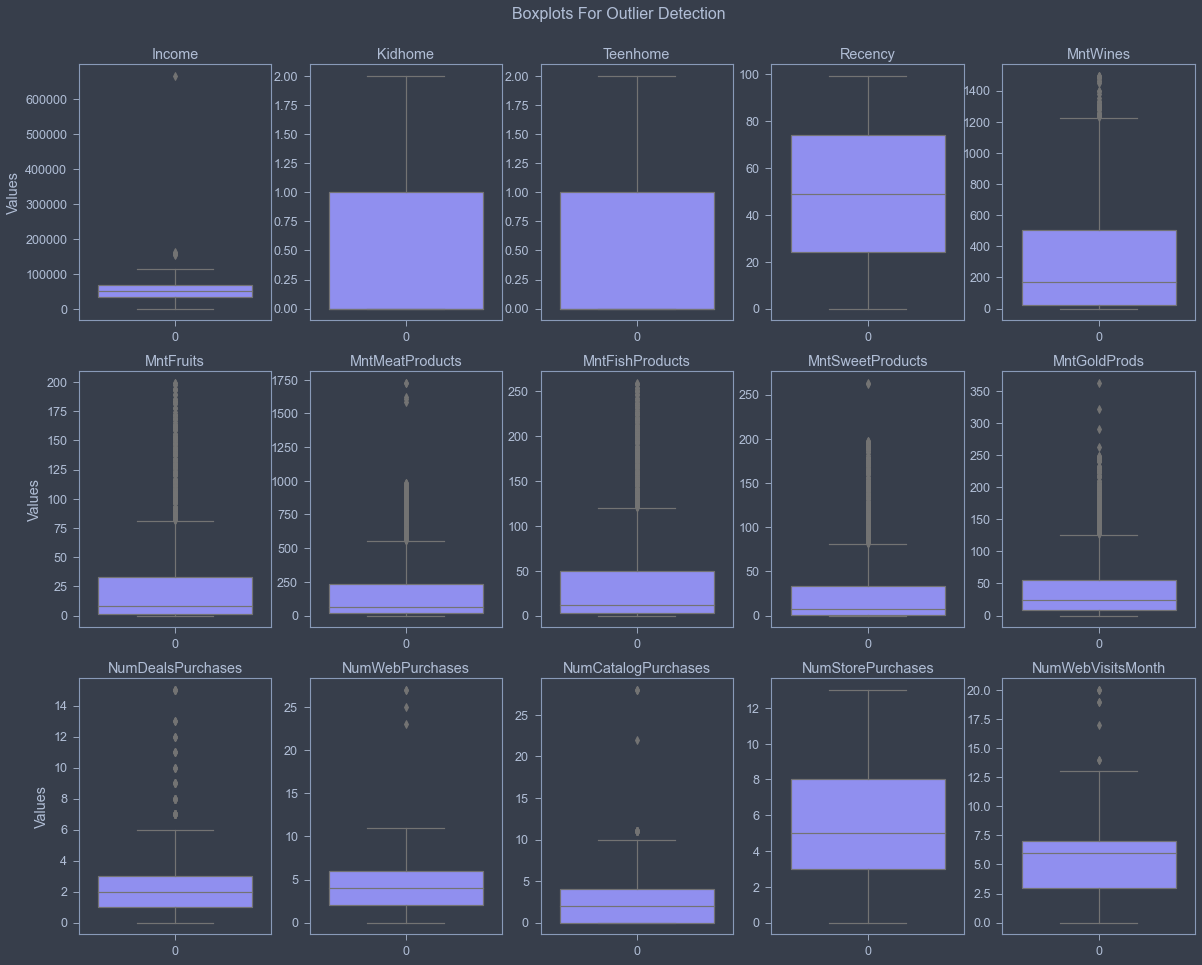

In [2082]:
#need to check on outliers to filter out
def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i], palette = 'cool')
        axs[i].set_title(data)
        
boxplots_custom(dataset=data, columns_list= ['Income', 'Kidhome','Teenhome', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'], rows=3, cols=5, suptitle='Boxplots For Outlier Detection')

In [2083]:
NumericalOutlierColumns = ['Income', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
Q1 = data[NumericalOutlierColumns].quantile(0.0)
Q3 = data[NumericalOutlierColumns].quantile(0.90)
IQR = Q3 - Q1
print('Interquartile Range for Variability of Median\n',IQR)

filtered_data = data[~((data[NumericalOutlierColumns] < (Q1 - 1.5 * IQR)) |(data[NumericalOutlierColumns] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(data.shape)
display(filtered_data.shape)

Interquartile Range for Variability of Median
 Income                 78114.0
MntWines                 822.1
MntFruits                 83.0
MntMeatProducts          499.0
MntFishProducts          120.0
MntSweetProducts          89.0
MntGoldProds             122.0
NumDealsPurchases          5.0
NumWebPurchases            8.0
NumCatalogPurchases        7.0
NumStorePurchases         11.0
NumWebVisitsMonth          8.0
dtype: float64


(2240, 29)

(2223, 29)

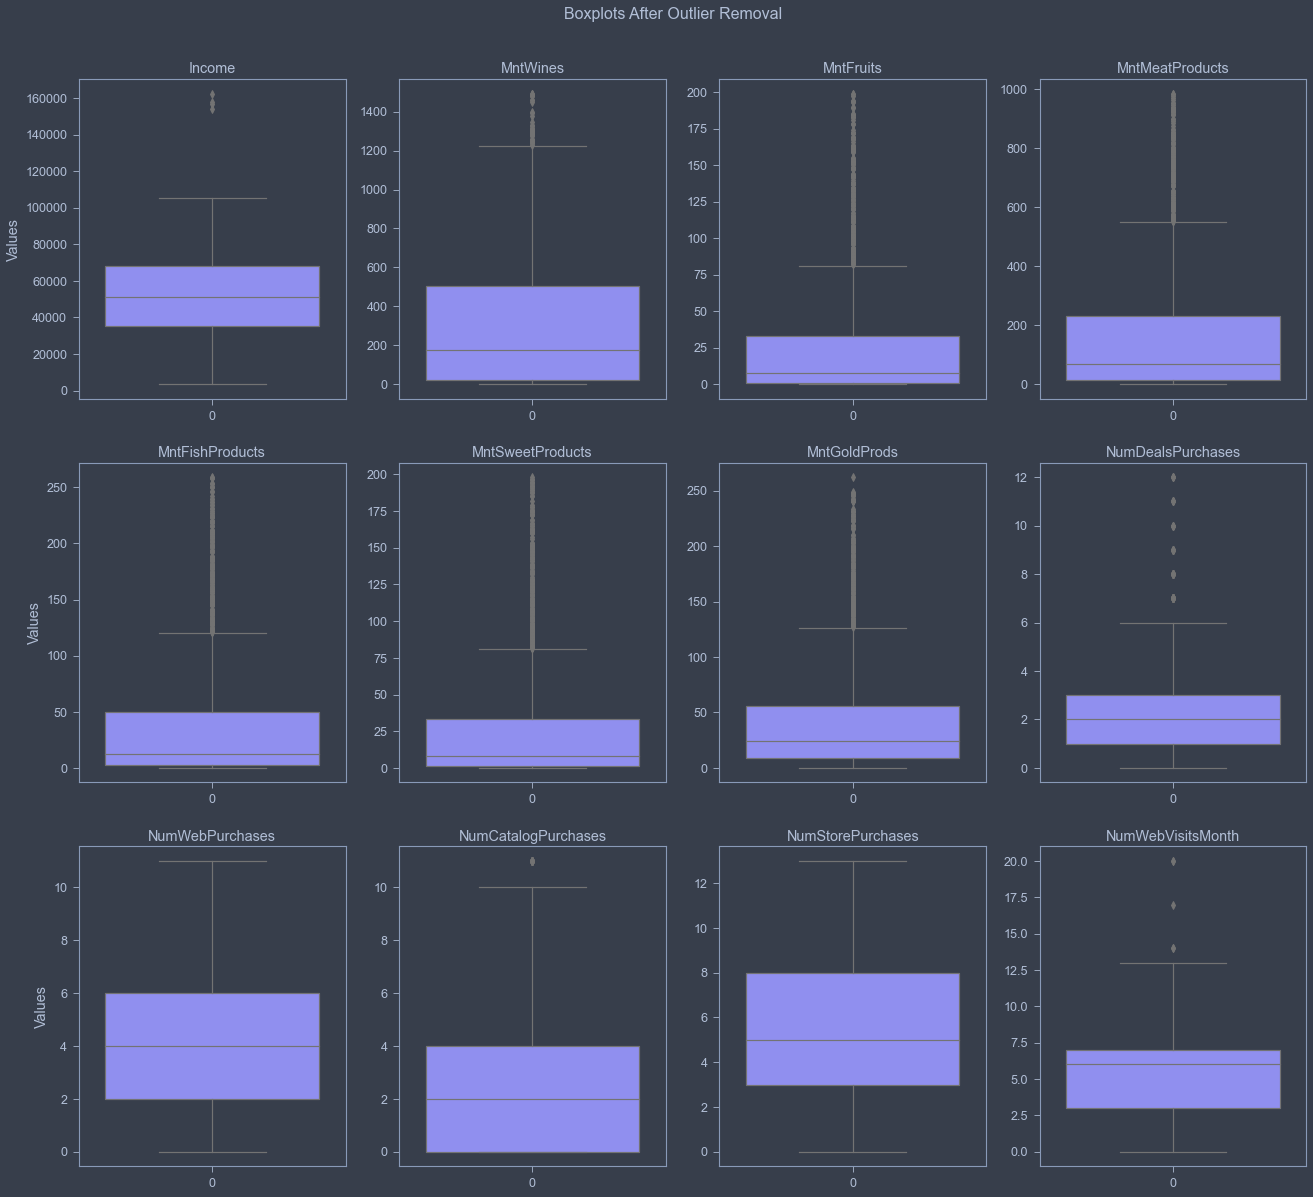

In [2088]:
#See if outliers were taken out 
NumericalOutlierColumns = ['Income', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(22,20)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i], palette = 'cool')
        axs[i].set_title(data)
        
boxplots_custom(dataset=filtered_data, columns_list= NumericalOutlierColumns, rows=3, cols=4, suptitle='Boxplots After Outlier Removal')

Skewness before filling nans 0.228
Skewness after filling nans 0.228


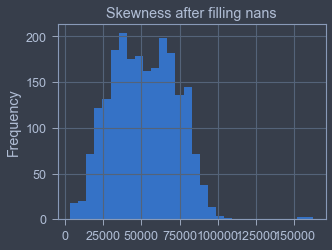

In [2089]:
data2 = filtered_data
print('Skewness before filling nans', round(data2['Income'].skew(),3))

data2["Income"] = data2["Income"].fillna(data.groupby(['Education', 'Kidhome'])["Income"].transform('mean')) #filling nans

data2['Income'].plot(kind='hist', bins=30)
plt.title('Skewness after filling nans')
plt.grid();
print('Skewness after filling nans', round(data2['Income'].skew(),3))

In [2029]:
#confirm NaN is gone after filter of outliers
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
mnt_products            0
year_month              0
dtype: int64

In [2030]:
#Organizing Data
        #will want to update education to american standards ✓
        #will want to create an age as it currently only shows birth year & categorical dimension✓
        #will want to have relationship be boolean to "Do they have a partner?"✓
        #will want to count teens as children 
        #will want to rename products, campaigns, and ways products were purchased as the naming convention currently is not clear


In [2031]:
print('The last day a consumer was enrolled is ', data['Dt_Customer'].dt.date.max())

The last day a consumer was enrolled is  2014-12-06


In [2032]:
#Make Age Categorical
data3 = data2
data3.rename(columns = {'Year_Birth':'Age'}, inplace = True)
data3['Age'] = data3.Age.apply(lambda x: 2021-x)
bins = [0, 35, 65, np.inf]
names = ['Young Age', 'Middle Age', 'Senior']
data3['Categorical_Age'] = pd.cut(data2['Age'], bins, labels=names)
data3.insert(2, 'CustomerFor', (np.datetime64('2016-12-07') - data['Dt_Customer']).dt.days)

#New Metric For Children as Boolean
data3['NumChildren'] = data2['Kidhome'] + data2['Teenhome']
data3['HasChildren'] = data2["NumChildren"].replace({0: 'No', 
                                                      1: 'Yes',
                                                      2: 'Yes',
                                                      3: 'Yes'})
#New Metric For Relationship as Boolean
data3['Marital_Status'].replace(['YOLO', 'Absurd', 'Alone'], 'Single', inplace=True)
data3['HasAPartner'] = data2["Marital_Status"].replace({'Single': 'No', 
                                                      'Widow': 'No',
                                                      'Divorced': 'No',
                                                      'Together': 'Yes',
                                                      'Married': 'Yes'})
#Education Update
data3['Education'].replace(['Basic','2n Cycle', 'Graduation'], 
                          ['Below Bachelor', 'Master', 'Bachelor'], inplace=True)

data3['MntTotal'] = data3.filter(like='Mnt').sum(axis=1)
#adding more metrics
data3['AvgWeb'] = round(data3['NumWebPurchases']/data3['NumWebVisitsMonth'],2)
data3.fillna({'AvgWeb' : 0},inplace=True) # Handling for cases where division by 0 may yield unwanted results
data3.replace(np.inf,0,inplace=True)

  
data3['NumTotal'] = np.sum(data3.filter(regex='Purchases'), axis=1)
for i in data3.filter(regex='Purchases').columns:
    if(i!='NumTotal'):
        data3[i] = round((data2[i]*100)/data3['NumTotal'],2)
        data3.fillna({i : 0},inplace=True)
data3.drop(columns=['NumTotal'],inplace=True)

data3['Expenses'] = data3['MntWines'] + data3['MntFruits'] + data3['MntMeatProducts'] + data3['MntFishProducts'] + data3['MntSweetProducts'] + data3['MntGoldProds']
data3['TotalAcceptedCmp'] = data3['AcceptedCmp1'] + data3['AcceptedCmp2'] + data3['AcceptedCmp3'] + data3['AcceptedCmp4'] + data3['AcceptedCmp5'] + data3['Response']
data3['NumTotalPurchases'] = data3['NumWebPurchases'] + data3['NumCatalogPurchases'] + data3['NumStorePurchases'] + data3['NumDealsPurchases']
data3['ExpensePer'] = round((data3['MntTotal']*100) / data3['Income'],2)

from datetime import date
today = date.today()

data3.rename(columns = {'Dt_Customer':'TotalEnrollDays'}, inplace = True)
data3['TotalEnrollDays'] = pd.to_datetime(today) - data3['TotalEnrollDays']
data3['TotalEnrollDays'] = [float(str(data3['TotalEnrollDays'][x])[:4]) for x in data2.index]
data3['TotalEnrollDays'] = round(data3['TotalEnrollDays']/365,2)
data3.rename(columns = {'TotalEnrollDays':'TotalEnrollYrs'}, inplace = True)

data3['NumAllPurchases'] = data3['NumWebPurchases']+data3['NumCatalogPurchases']+data3['NumStorePurchases']
data3['AverageCheck'] = round((data3['MntTotal'] / data3['NumAllPurchases']), 1)

data3

,ID,Age,CustomerFor,Education,Marital_Status,Income,Kidhome,Teenhome,TotalEnrollYrs,Recency,...,HasChildren,HasAPartner,MntTotal,AvgWeb,Expenses,TotalAcceptedCmp,NumTotalPurchases,ExpensePer,NumAllPurchases,AverageCheck
0,5524,64,1703,Bachelor,Single,58138.0,0,0,9.63,58,...,No,No,1617,1.14,1617,1,100.00,2.78,88.00,18.4
1,2174,67,857,Bachelor,Single,46344.0,1,1,7.31,38,...,Yes,No,27,0.20,27,0,100.00,0.06,66.67,0.4
2,4141,56,1204,Bachelor,Together,71613.0,0,0,8.26,26,...,No,Yes,776,2.00,776,0,100.00,1.08,95.24,8.1
3,6182,37,797,Bachelor,Together,26646.0,1,0,7.15,26,...,Yes,Yes,53,0.33,53,0,100.00,0.20,75.00,0.7
4,5324,40,1053,PhD,Married,58293.0,1,0,7.85,94,...,Yes,Yes,422,1.00,422,0,100.01,0.72,73.69,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,54,1273,Bachelor,Married,61223.0,0,1,8.45,46,...,Yes,Yes,1341,1.80,1341,0,100.00,2.19,88.89,15.1
2236,4001,75,793,PhD,Together,64014.0,2,1,7.13,56,...,Yes,Yes,444,1.14,444,1,100.00,0.69,68.18,6.5
2237,7270,40,1047,Bachelor,Divorced,56981.0,0,0,7.83,91,...,No,No,1241,0.33,1241,1,100.00,2.18,94.74,13.1
2238,8235,65,1048,Master,Together,69245.0,0,1,7.83,8,...,Yes,Yes,843,2.00,843,0,100.01,1.22,91.31,9.2


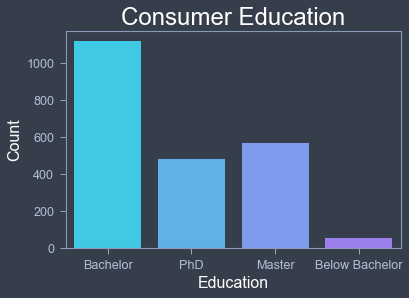

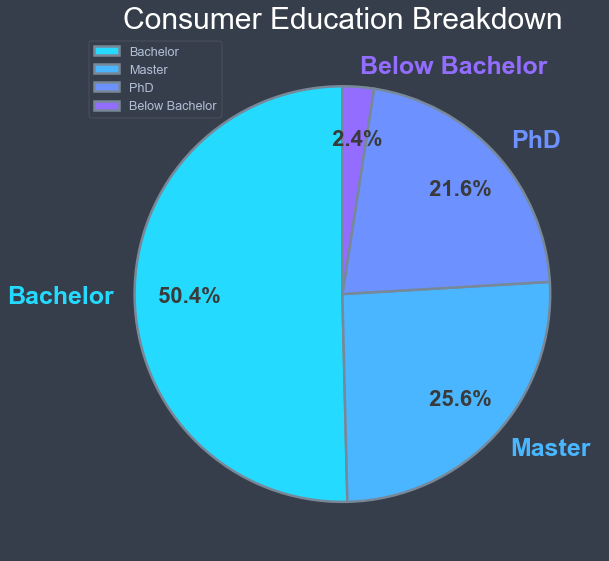

In [2033]:
#Education Percentage

Cool = sns.color_palette('cool')[0:5]

fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x= data3['Education'], palette=Cool, data=data2)
plt.xlabel("Education", size=16, color= 'white')
plt.ylabel("Count", size=16, color= 'white')
plt.title("Consumer Education", size=24, color= 'white')

fig, ax = plt.subplots(figsize=(10, 8))
porportion = dict(data3['Education'].value_counts())
patches, texts, pcts = ax.pie(porportion.values(), labels=porportion.keys(), autopct ='% .1f%%', pctdistance=0.75,
    wedgeprops={'linewidth': 2.5, 'edgecolor': '#778899'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors = Cool)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='#3A3A3A', fontweight='bold', fontsize = 22)
plt.setp(texts, fontweight=600, fontsize = 25)
plt.legend(patches, labels=porportion.keys(), loc="upper left")
ax.set_title('Consumer Education Breakdown', fontsize=30, color= 'white')

plt.tight_layout()
plt.show()

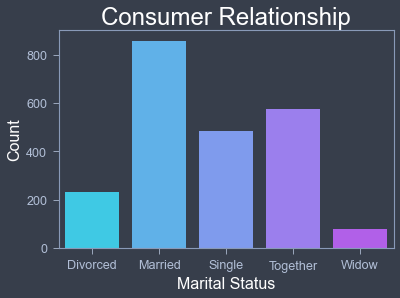

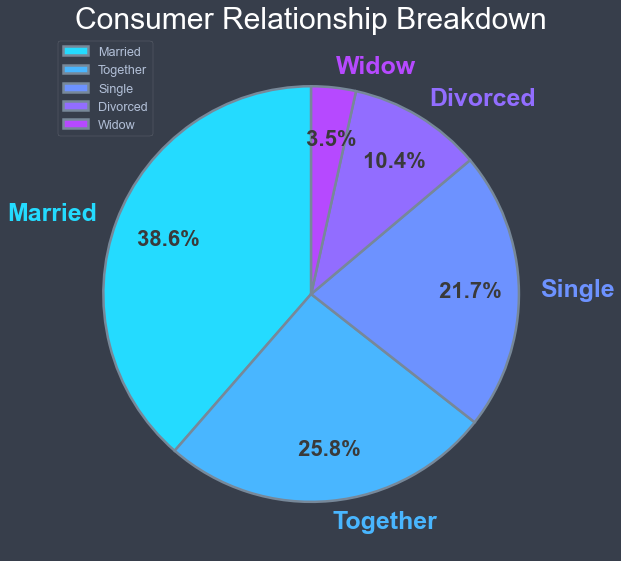

In [2034]:
#Relationship Percentage

porportion = dict(data3['Marital_Status'].value_counts())
Cool = sns.color_palette('cool')[0:5]

fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x= data3['Marital_Status'], palette=Cool, data=data2)
plt.xlabel("Marital Status", size=16, color= 'white')
plt.ylabel("Count", size=16, color= 'white')
plt.title("Consumer Relationship", size=24, color= 'white')

fig, ax = plt.subplots(figsize=(10,8))
patches, texts, pcts = ax.pie(porportion.values(), labels=porportion.keys(), autopct ='% .1f%%', pctdistance=0.75,
    wedgeprops={'linewidth': 2.5, 'edgecolor': '#778899'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors = Cool)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='#3A3A3A', fontweight='bold', fontsize = 22)
plt.setp(texts, fontweight=600, fontsize = 25)
plt.legend(patches, labels=porportion.keys(), loc="upper left")
ax.set_title('Consumer Relationship Breakdown', fontsize=30, color= 'white')

plt.tight_layout()
plt.show()

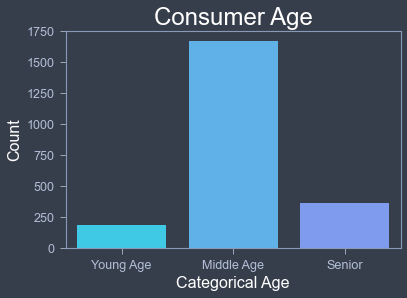

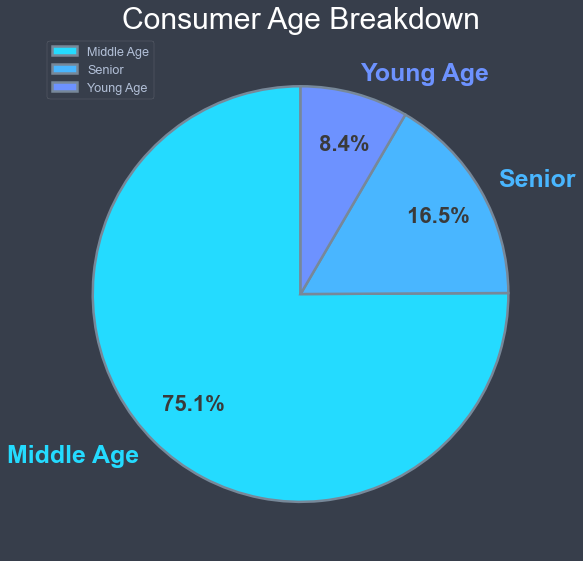

In [2090]:
#Age Percentage
porportion = dict(data3['Categorical_Age'].value_counts())
Cool = sns.color_palette('cool')[0:5]

fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x= data3['Categorical_Age'], palette=Cool, data=data2)
plt.xlabel("Categorical Age", size=16, color= 'white')
plt.ylabel("Count", size=16, color= 'white')
plt.title("Consumer Age", size=24, color= 'white')

fig, ax = plt.subplots(figsize=(10,8))
patches, texts, pcts = ax.pie(porportion.values(), labels=porportion.keys(), autopct ='% .1f%%', pctdistance=0.75,
    wedgeprops={'linewidth': 2.5, 'edgecolor': '#778899'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors = Cool)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='#3A3A3A', fontweight='bold', fontsize = 22)
plt.setp(texts, fontweight=600, fontsize = 25)
plt.legend(patches, labels=porportion.keys(), loc="upper left")
ax.set_title('Consumer Age Breakdown', fontsize=30, color= 'white')

plt.tight_layout()
plt.show()

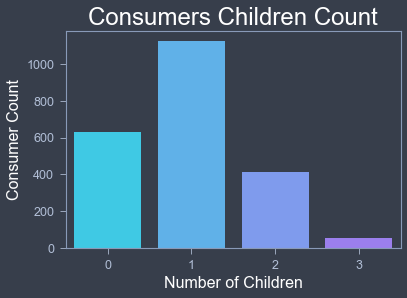

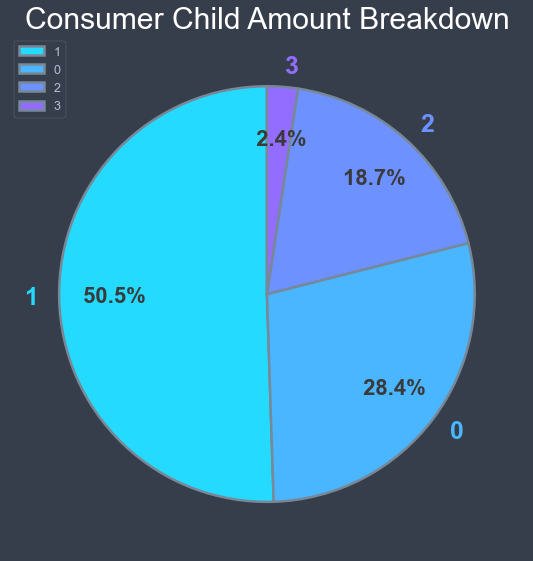

In [2036]:
#Child Percentage
porportion = dict(data3['NumChildren'].value_counts())
Cool = sns.color_palette('cool')[0:5]

fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x= data3['NumChildren'], palette=Cool, data=data2)
plt.xlabel("Number of Children", size=16, color= 'white')
plt.ylabel("Consumer Count", size=16, color= 'white')
plt.title("Consumers Children Count", size=24, color= 'white')

fig, ax = plt.subplots(figsize=(10,8))
patches, texts, pcts = ax.pie(porportion.values(), labels=porportion.keys(), autopct ='% .1f%%', pctdistance=0.75,
    wedgeprops={'linewidth': 2.5, 'edgecolor': '#778899'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors = Cool)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='#3A3A3A', fontweight='bold', fontsize = 22)
plt.setp(texts, fontweight=600, fontsize = 25)
plt.legend(patches, labels=porportion.keys(), loc="upper left")
ax.set_title('Consumer Child Amount Breakdown', fontsize=30, color= 'white')

plt.tight_layout()
plt.show()

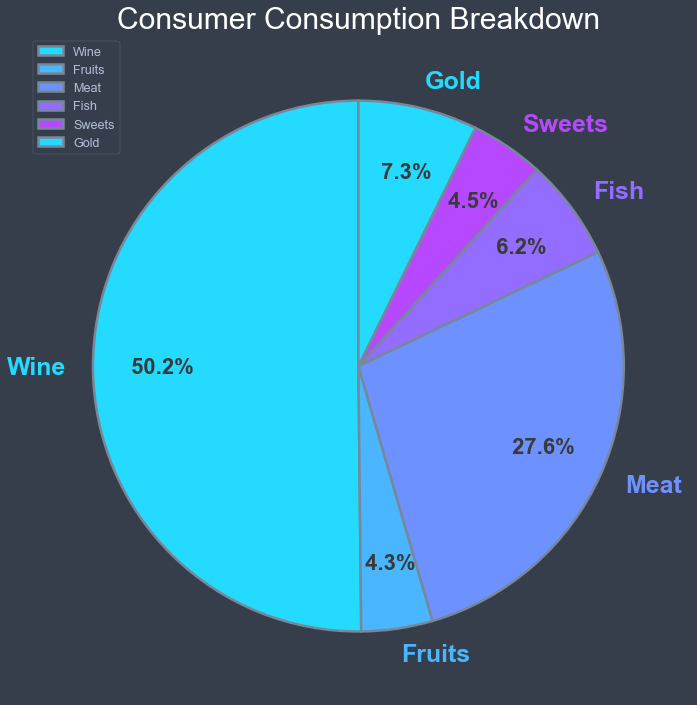

In [2037]:
#Product Percentage
mnt = data.filter(like='Mnt').apply(lambda x: sum(x), axis=0)
porportion = dict(mnt)
Cool = sns.color_palette('cool')[0:5]
fig, ax = plt.subplots(figsize=(12,10))
patches, texts, pcts = ax.pie(porportion.values(), labels=['Wine', 'Fruits', 'Meat','Fish', 'Sweets', 'Gold'], 
                        autopct ='% .1f%%', 
                        pctdistance=0.75,
                        wedgeprops={'linewidth': 2.5, 'edgecolor': '#778899'},
                        textprops={'size': 'x-large'},
                        startangle=90,
                        colors = Cool)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='#3A3A3A', fontweight='bold', fontsize = 22)
plt.setp(texts, fontweight=600, fontsize = 25)
plt.legend(patches, labels=['Wine', 'Fruits', 'Meat','Fish', 'Sweets', 'Gold'], loc="upper left")
ax.set_title('Consumer Consumption Breakdown', fontsize=30, color= 'white')
plt.tight_layout()
plt.show()

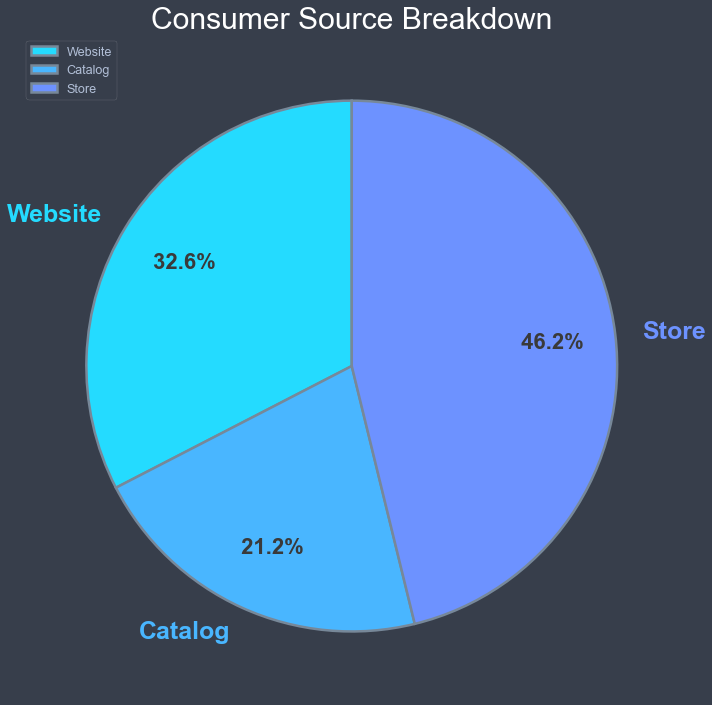

In [2038]:
#Source Percentage
num = data.filter(regex='Num[^Deals].+Purchases').sum(axis=0)
porportion = dict(num)
Cool = sns.color_palette('cool')[0:5]
fig, ax = plt.subplots(figsize=(12,10))

patches, texts, pcts = ax.pie(porportion.values(), labels=['Website', 'Catalog', 'Store'], 
                        autopct ='% .1f%%', 
                        pctdistance=0.75,
                        wedgeprops={'linewidth': 2.5, 'edgecolor': '#778899'},
                        textprops={'size': 'x-large'},
                        startangle=90,
                        colors = Cool)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='#3A3A3A', fontweight='bold', fontsize = 22)
plt.setp(texts, fontweight=600, fontsize = 25)
plt.legend(patches, labels=['Website', 'Catalog', 'Store'], loc="upper left")
ax.set_title('Consumer Source Breakdown', fontsize=30, color= 'white')
plt.tight_layout()
plt.show()

In [2039]:
#Product Purchase Total
data3 = data3.assign(
        percentWines=lambda x: x['MntWines'] / x['MntTotal'] * 100,
        percentMeat=lambda x: x['MntMeatProducts'] / x['MntTotal'] * 100,
        percentFruits=lambda x: x['MntFruits'] / x['MntTotal'] * 100,
        percentFish=lambda x: x['MntFishProducts'] / x['MntTotal'] * 100,
        percentSweets=lambda x: x['MntSweetProducts'] / x['MntTotal'] * 100,
        percentGold=lambda x: x['MntGoldProds'] / x['MntTotal'] * 100,
)
data3.head()

,ID,Age,CustomerFor,Education,Marital_Status,Income,Kidhome,Teenhome,TotalEnrollYrs,Recency,...,NumTotalPurchases,ExpensePer,NumAllPurchases,AverageCheck,percentWines,percentMeat,percentFruits,percentFish,percentSweets,percentGold
0,5524,64,1703,Bachelor,Single,58138.0,0,0,9.63,58,...,100.00,2.78,88.00,18.4,39.270254,33.766234,5.442177,10.636982,5.442177,5.442177
1,2174,67,857,Bachelor,Single,46344.0,1,1,7.31,38,...,100.00,0.06,66.67,0.4,40.740741,22.222222,3.703704,7.407407,3.703704,22.222222
2,4141,56,1204,Bachelor,Together,71613.0,0,0,8.26,26,...,100.00,1.08,95.24,8.1,54.896907,16.365979,6.314433,14.304124,2.706186,5.412371
3,6182,37,797,Bachelor,Together,26646.0,1,0,7.15,26,...,100.00,0.20,75.00,0.7,20.754717,37.735849,7.547170,18.867925,5.660377,9.433962
4,5324,40,1053,PhD,Married,58293.0,1,0,7.85,94,...,100.01,0.72,73.69,5.7,40.995261,27.962085,10.189573,10.900474,6.398104,3.554502


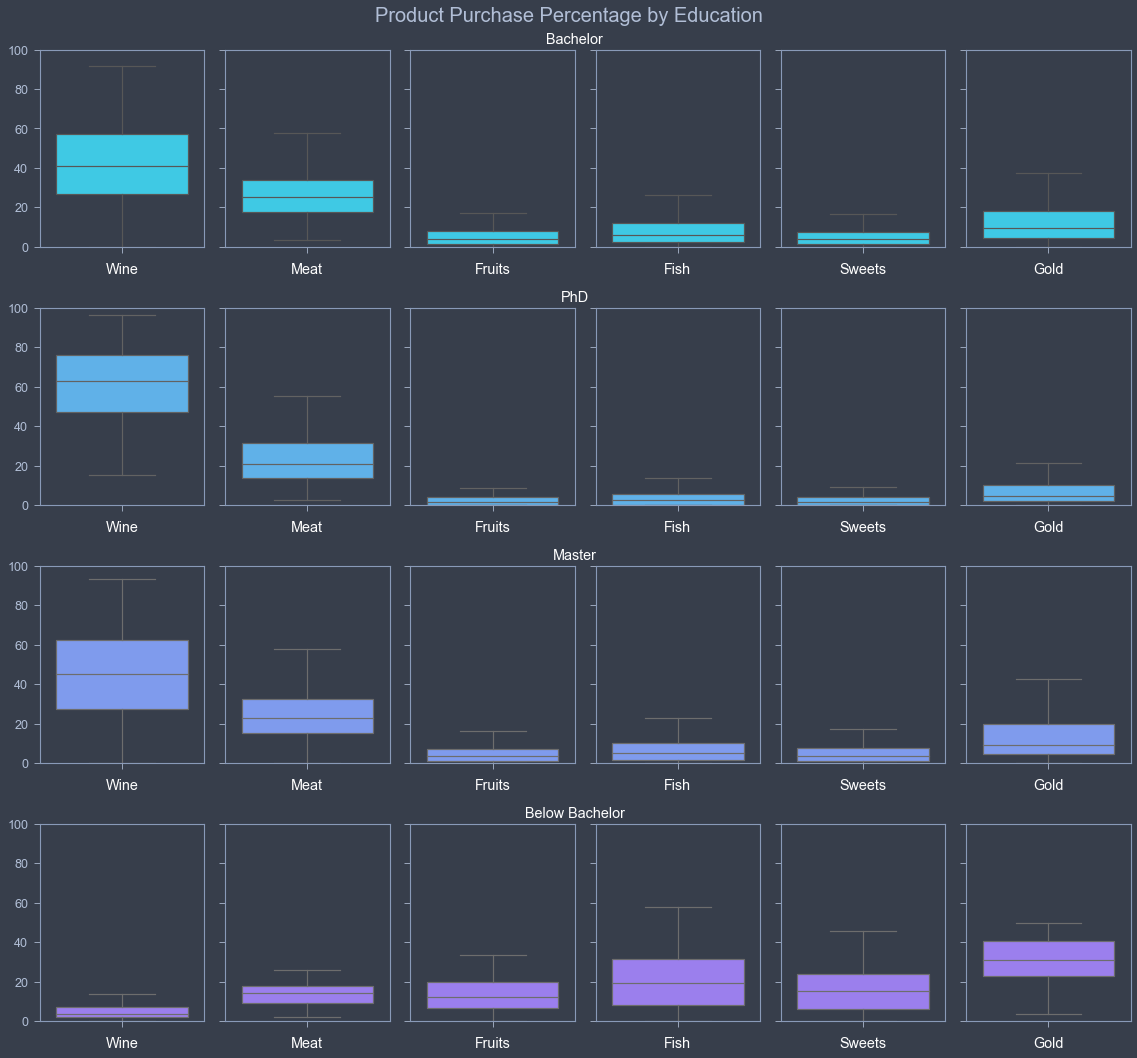

In [2040]:
#Product Purchase & Education
fig, axes = plt.subplots(4, 6, figsize=(16, 15), sharey=True)
fig.suptitle('Product Purchase Percentage by Education', fontsize=20)
Cool = sns.color_palette('cool')[0:5]

for i, value in enumerate(data3['Education'].unique()):
    sns.boxplot(data=data3.query(f'Education == "{value}"'), y='percentWines', showfliers=False, color=Cool[i], ax=axes[i, 0])
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].set_xlabel('Wine', color = 'White')
    axes[i, 0].set_ylabel('', color = 'White')
    
    sns.boxplot(data=data3.query(f'Education == "{value}"'), y='percentMeat', showfliers=False, color=Cool[i], ax=axes[i, 1])
    axes[i, 1].set_xlabel('Meat', color = 'White')
    axes[i, 1].set_ylabel('', color = 'White')
    
    sns.boxplot(data=data3.query(f'Education == "{value}"'), y='percentFruits', showfliers=False, color=Cool[i], ax=axes[i, 2])
    axes[i, 2].set_xlabel('Fruits', color = 'White')
    axes[i, 2].set_ylabel('', color = 'White')
    axes[i, 2].set_title(f'{value}', x=1, color = 'White')
    
    sns.boxplot(data=data3.query(f'Education == "{value}"'), y='percentFish', showfliers=False, color=Cool[i], ax=axes[i, 3])
    axes[i, 3].set_xlabel('Fish', color = 'White')
    axes[i, 3].set_ylabel('', color = 'White')
    
    sns.boxplot(data=data3.query(f'Education == "{value}"'), y='percentSweets', showfliers=False, color=Cool[i], ax=axes[i, 4])
    axes[i, 4].set_xlabel('Sweets', color = 'White')
    axes[i, 4].set_ylabel('', color = 'White')
    
    sns.boxplot(data=data3.query(f'Education == "{value}"'), y='percentGold', showfliers=False, color=Cool[i], ax=axes[i, 5])
    axes[i, 5].set_xlabel('Gold', color = 'White')
    axes[i, 5].set_ylabel('', color = 'White')
    
plt.tight_layout()

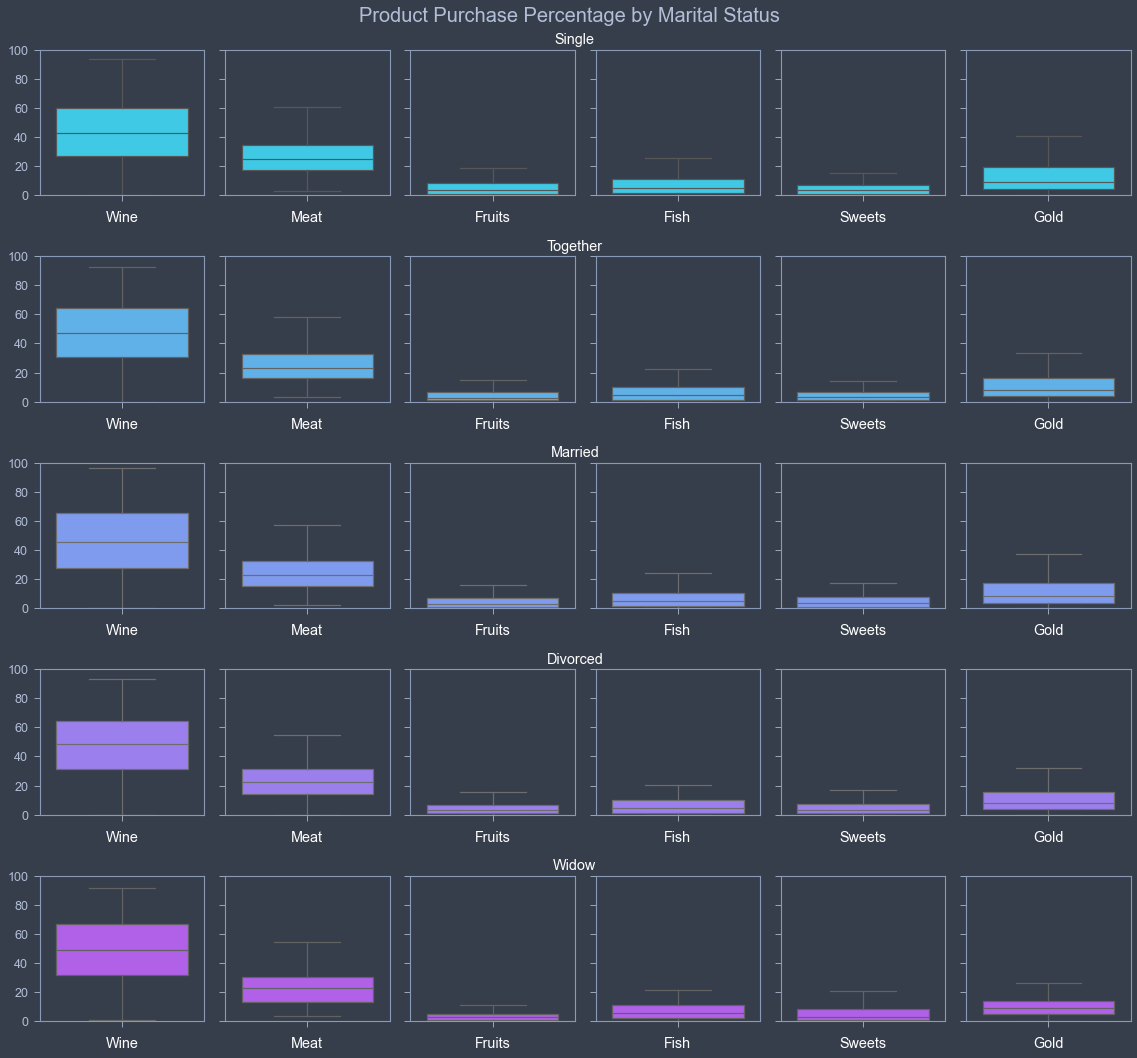

In [2041]:
#Product Purchase & Relationship
fig, axes = plt.subplots(5, 6, figsize=(16, 15), sharey=True)
fig.suptitle('Product Purchase Percentage by Marital Status', fontsize=20)
Cool = sns.color_palette('cool')[0:5]

for i, value in enumerate(data3['Marital_Status'].unique()):
    sns.boxplot(data=data3.query(f'Marital_Status == "{value}"'), y='percentWines', showfliers=False, color=Cool[i], ax=axes[i, 0])
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].set_xlabel('Wine', color = 'White')
    axes[i, 0].set_ylabel('', color = 'White')
    
    sns.boxplot(data=data3.query(f'Marital_Status== "{value}"'), y='percentMeat', showfliers=False, color=Cool[i], ax=axes[i, 1])
    axes[i, 1].set_xlabel('Meat', color = 'White')
    axes[i, 1].set_ylabel('', color = 'White')
    
    sns.boxplot(data=data3.query(f'Marital_Status == "{value}"'), y='percentFruits', showfliers=False, color=Cool[i], ax=axes[i, 2])
    axes[i, 2].set_xlabel('Fruits', color = 'White')
    axes[i, 2].set_ylabel('', color = 'White')
    axes[i, 2].set_title(f'{value}', x=1, color = 'White')
    
    sns.boxplot(data=data3.query(f'Marital_Status == "{value}"'), y='percentFish', showfliers=False, color=Cool[i], ax=axes[i, 3])
    axes[i, 3].set_xlabel('Fish', color = 'White')
    axes[i, 3].set_ylabel('', color = 'White')
    
    sns.boxplot(data=data3.query(f'Marital_Status == "{value}"'), y='percentSweets', showfliers=False, color=Cool[i], ax=axes[i, 4])
    axes[i, 4].set_xlabel('Sweets', color = 'White')
    axes[i, 4].set_ylabel('', color = 'White')
    
    sns.boxplot(data=data3.query(f'Marital_Status == "{value}"'), y='percentGold', showfliers=False, color=Cool[i], ax=axes[i, 5])
    axes[i, 5].set_xlabel('Gold', color = 'White')
    axes[i, 5].set_ylabel('', color = 'White')
    
plt.tight_layout()

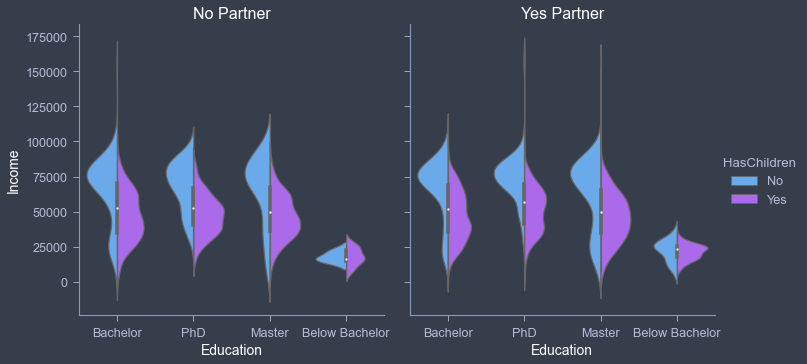

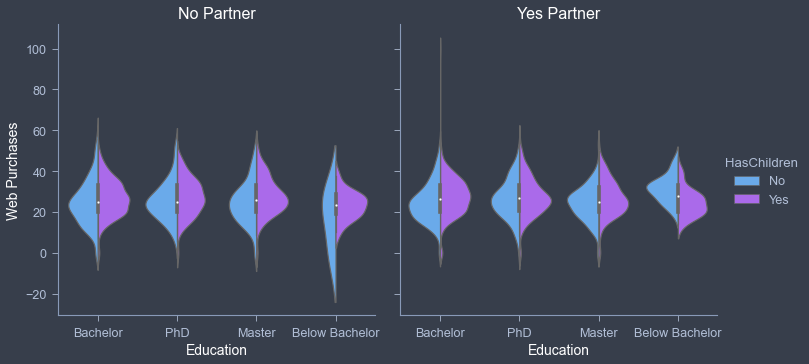

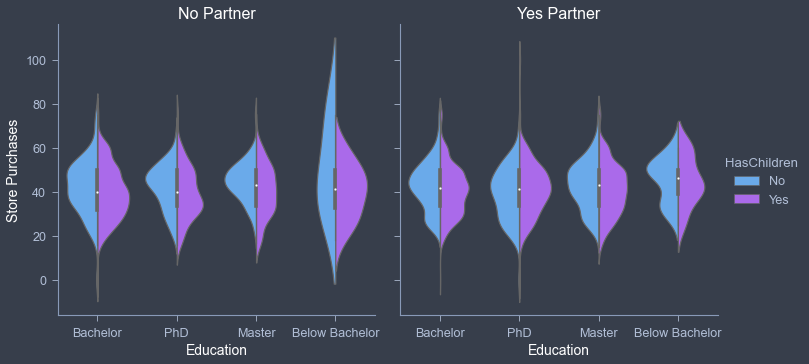

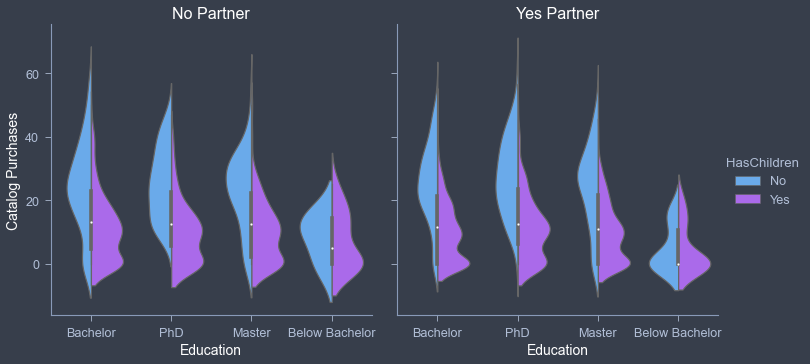

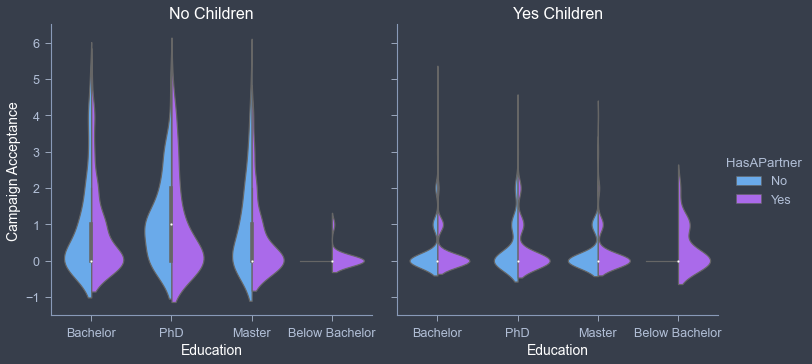

In [2093]:
#Relationship between varaibles
g = sns.catplot(x="Education", y="Income",
                hue="HasChildren", col="HasAPartner",
                data=data3, kind="violin", split=True, palette = 'cool')
g.set_axis_labels("Education", "Income",size=14, color = 'White')
g.set_xticklabels(label=[ "Below Bachelor", "Bachelor", "Master", "PhD"])
g.set_titles(col_template="{col_name} Partner", row_template="{row_name}", size=16, color = 'White')

g = sns.catplot(x="Education", y="NumWebPurchases",
                hue="HasChildren", col="HasAPartner",
                data=data3, kind="violin", split=True, palette = 'cool')
g.set_axis_labels("Education", "Web Purchases",size=14, color = 'White')
g.set_xticklabels(label=[ "Below Bachelor", "Bachelor", "Master", "PhD"])
g.set_titles(col_template="{col_name} Partner", row_template="{row_name}", size=16, color = 'White')

g = sns.catplot(x="Education", y="NumStorePurchases",
                hue="HasChildren", col="HasAPartner",
                data=data3, kind="violin", split=True, palette = 'cool')
g.set_axis_labels("Education", "Store Purchases",size=14, color = 'White')
g.set_xticklabels(label=[ "Below Bachelor", "Bachelor", "Master", "PhD"])
g.set_titles(col_template="{col_name} Partner", row_template="{row_name}", size=16, color = 'White')

g = sns.catplot(x="Education", y="NumCatalogPurchases",
                hue="HasChildren", col="HasAPartner",
                data=data3, kind="violin", split=True, palette = 'cool')
g.set_axis_labels("Education", "Catalog Purchases",size=14, color = 'White')
g.set_xticklabels(label=[ "Below Bachelor", "Bachelor", "Master", "PhD"])
g.set_titles(col_template="{col_name} Partner", row_template="{row_name}", size=16, color = 'White')

g = sns.catplot(x="Education", y="TotalAcceptedCmp",
                hue="HasAPartner", col="HasChildren",
                data=data3, kind="violin", split=True, palette = 'cool')
g.set_axis_labels("Education", "Campaign Acceptance",size=14, color = 'White')
g.set_xticklabels(label=[ "Below Bachelor", "Bachelor", "Master", "PhD"])
g.set_titles(col_template="{col_name} Children", row_template="{row_name}", size=16, color = 'White')

In [2043]:
#ANALYSIS
data4 = data3
data4.drop(['ID'], axis = 1, inplace = True)
data4

,Age,CustomerFor,Education,Marital_Status,Income,Kidhome,Teenhome,TotalEnrollYrs,Recency,MntWines,...,NumTotalPurchases,ExpensePer,NumAllPurchases,AverageCheck,percentWines,percentMeat,percentFruits,percentFish,percentSweets,percentGold
0,64,1703,Bachelor,Single,58138.0,0,0,9.63,58,635,...,100.00,2.78,88.00,18.4,39.270254,33.766234,5.442177,10.636982,5.442177,5.442177
1,67,857,Bachelor,Single,46344.0,1,1,7.31,38,11,...,100.00,0.06,66.67,0.4,40.740741,22.222222,3.703704,7.407407,3.703704,22.222222
2,56,1204,Bachelor,Together,71613.0,0,0,8.26,26,426,...,100.00,1.08,95.24,8.1,54.896907,16.365979,6.314433,14.304124,2.706186,5.412371
3,37,797,Bachelor,Together,26646.0,1,0,7.15,26,11,...,100.00,0.20,75.00,0.7,20.754717,37.735849,7.547170,18.867925,5.660377,9.433962
4,40,1053,PhD,Married,58293.0,1,0,7.85,94,173,...,100.01,0.72,73.69,5.7,40.995261,27.962085,10.189573,10.900474,6.398104,3.554502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,54,1273,Bachelor,Married,61223.0,0,1,8.45,46,709,...,100.00,2.19,88.89,15.1,52.870992,13.571961,3.206562,3.131991,8.799403,18.419090
2236,75,793,PhD,Together,64014.0,2,1,7.13,56,406,...,100.00,0.69,68.18,6.5,91.441441,6.756757,0.000000,0.000000,0.000000,1.801802
2237,40,1047,Bachelor,Divorced,56981.0,0,0,7.83,91,908,...,100.00,2.18,94.74,13.1,73.166801,17.485898,3.867849,2.578566,0.966962,1.933924
2238,65,1048,Master,Together,69245.0,0,1,7.83,8,428,...,100.01,1.22,91.31,9.2,50.771056,25.385528,3.558719,9.489917,3.558719,7.236062


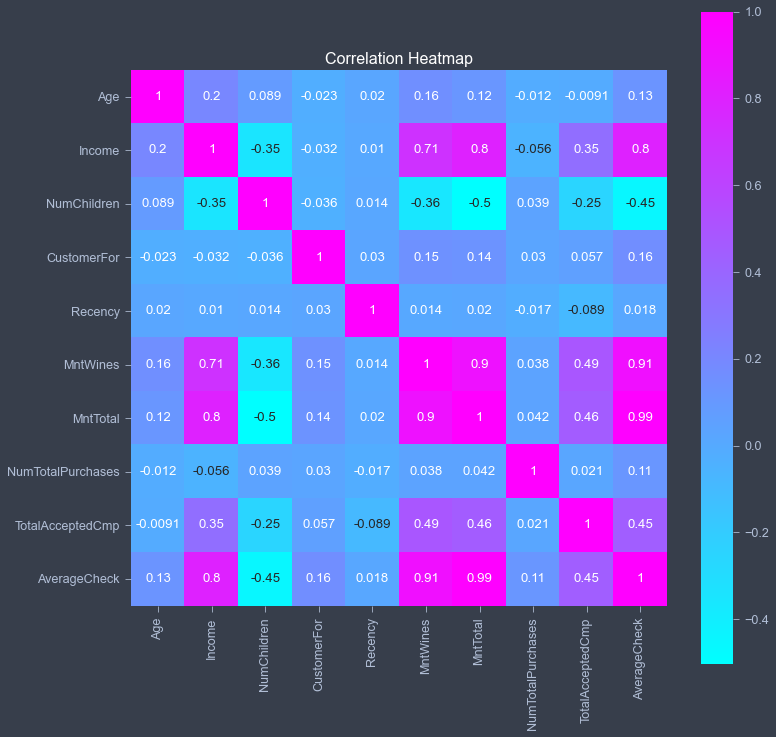

In [2044]:
#see variance in heatmap form without no variance columns
NUMERICAL_FEATURES = ['Age', 'Income', 'NumChildren', 'CustomerFor', 
                      'Recency', 'MntWines', 'MntTotal', 
                      'NumTotalPurchases', 'TotalAcceptedCmp', 'AverageCheck']
corr_matr = data4[NUMERICAL_FEATURES].corr(method='pearson')
plt.figure(figsize=(12,12))
sns.heatmap(corr_matr, annot=True, cmap='cool', square=True)
plt.title("Correlation Heatmap", size=16, color = 'white')
plt.show()

In [2045]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2239
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2223 non-null   int64   
 1   Age                  2223 non-null   int64   
 2   CustomerFor          2223 non-null   int64   
 3   Education            2223 non-null   object  
 4   Marital_Status       2223 non-null   category
 5   Income               2223 non-null   float64 
 6   Kidhome              2223 non-null   int64   
 7   Teenhome             2223 non-null   int64   
 8   TotalEnrollYrs       2223 non-null   float64 
 9   Recency              2223 non-null   int64   
 10  MntWines             2223 non-null   int64   
 11  MntFruits            2223 non-null   int64   
 12  MntMeatProducts      2223 non-null   int64   
 13  MntFishProducts      2223 non-null   int64   
 14  MntSweetProducts     2223 non-null   int64   
 15  MntGoldProds         

In [2046]:
data5 = data4
data5['AverageCheck'] = data5['AverageCheck'].replace(np.inf, np.nan)
data5 = data5.fillna(data5.mean())
data5.isnull()

,Age,CustomerFor,Education,Marital_Status,Income,Kidhome,Teenhome,TotalEnrollYrs,Recency,MntWines,...,NumTotalPurchases,ExpensePer,NumAllPurchases,AverageCheck,percentWines,percentMeat,percentFruits,percentFish,percentSweets,percentGold
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [2118]:
SELECTED_FEATURES = ['AverageCheck', 'Income', 'NumTotalPurchases', 'MntTotal']
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

df = data5[SELECTED_FEATURES]
# kmeans.fit(data4[SELECTED_FEATURES])
kmeans.fit(df)

pred = kmeans.predict(df)

df['cluster'] = kmeans.labels_

df

,AverageCheck,Income,NumTotalPurchases,MntTotal,cluster
0,18.4,58138.0,100.00,1617,0
1,0.4,46344.0,100.00,27,3
2,8.1,71613.0,100.00,776,2
3,0.7,26646.0,100.00,53,1
4,5.7,58293.0,100.01,422,0
...,...,...,...,...,...
2235,15.1,61223.0,100.00,1341,0
2236,6.5,64014.0,100.00,444,0
2237,13.1,56981.0,100.00,1241,0
2238,9.2,69245.0,100.01,843,0


In [2119]:
data6 = data5
data6['K_Cluster'] = pd.Series(pred, index=df.index)
data6.head()

,Age,CustomerFor,Education,Marital_Status,Income,Kidhome,Teenhome,TotalEnrollYrs,Recency,MntWines,...,AverageCheck,percentWines,percentMeat,percentFruits,percentFish,percentSweets,percentGold,K_Cluster,G_Cluster,HasPartner
0,64,1703,1,Single,58138.0,0,0,9.63,58,635,...,18.4,39.270254,33.766234,5.442177,10.636982,5.442177,5.442177,0,0,0
1,67,857,1,Single,46344.0,1,1,7.31,38,11,...,0.4,40.740741,22.222222,3.703704,7.407407,3.703704,22.222222,3,0,0
2,56,1204,1,Together,71613.0,0,0,8.26,26,426,...,8.1,54.896907,16.365979,6.314433,14.304124,2.706186,5.412371,2,0,1
3,37,797,1,Together,26646.0,1,0,7.15,26,11,...,0.7,20.754717,37.735849,7.547170,18.867925,5.660377,9.433962,1,0,1
4,40,1053,3,Married,58293.0,1,0,7.85,94,173,...,5.7,40.995261,27.962085,10.189573,10.900474,6.398104,3.554502,0,0,1


In [2120]:
SELECTED_FEATURES = ['AverageCheck', 'Income', 'NumTotalPurchases', 'MntTotal']
gmm = GaussianMixture(n_components = 4, random_state=42)
df2 = (data5[SELECTED_FEATURES])
gmm.fit(df2)

labels = gmm.predict(df2)
frame = pd.DataFrame(df2)
frame['cluster'] = labels

df2

,AverageCheck,Income,NumTotalPurchases,MntTotal,cluster
0,18.4,58138.0,100.00,1617,3
1,0.4,46344.0,100.00,27,0
2,8.1,71613.0,100.00,776,3
3,0.7,26646.0,100.00,53,0
4,5.7,58293.0,100.01,422,3
...,...,...,...,...,...
2235,15.1,61223.0,100.00,1341,3
2236,6.5,64014.0,100.00,444,3
2237,13.1,56981.0,100.00,1241,3
2238,9.2,69245.0,100.01,843,3


In [2121]:
data6 = data5  
data6['G_Cluster'] = pd.Series(labels, index=df.index)
data6.head()

,Age,CustomerFor,Education,Marital_Status,Income,Kidhome,Teenhome,TotalEnrollYrs,Recency,MntWines,...,AverageCheck,percentWines,percentMeat,percentFruits,percentFish,percentSweets,percentGold,K_Cluster,G_Cluster,HasPartner
0,64,1703,1,Single,58138.0,0,0,9.63,58,635,...,18.4,39.270254,33.766234,5.442177,10.636982,5.442177,5.442177,0,3,0
1,67,857,1,Single,46344.0,1,1,7.31,38,11,...,0.4,40.740741,22.222222,3.703704,7.407407,3.703704,22.222222,3,0,0
2,56,1204,1,Together,71613.0,0,0,8.26,26,426,...,8.1,54.896907,16.365979,6.314433,14.304124,2.706186,5.412371,2,3,1
3,37,797,1,Together,26646.0,1,0,7.15,26,11,...,0.7,20.754717,37.735849,7.547170,18.867925,5.660377,9.433962,1,0,1
4,40,1053,3,Married,58293.0,1,0,7.85,94,173,...,5.7,40.995261,27.962085,10.189573,10.900474,6.398104,3.554502,0,3,1


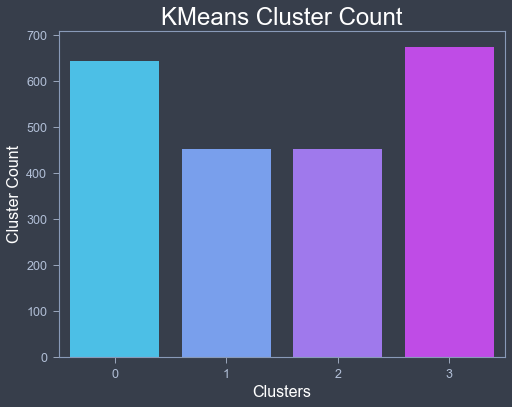

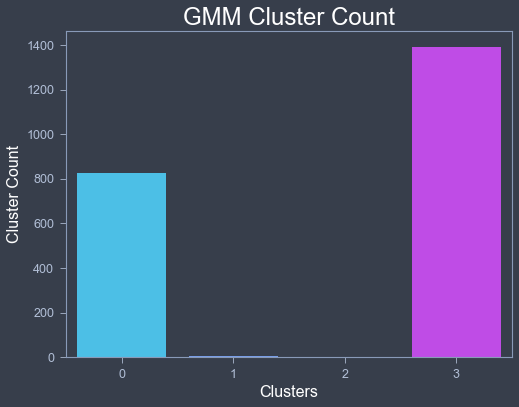

In [2122]:

plt.figure(figsize=(8, 6))
pl = sns.countplot(x=data6["K_Cluster"], palette= 'cool')
plt.xlabel("Clusters", size=16, color= 'white')
plt.ylabel("Cluster Count", size=16, color= 'white')
plt.title("KMeans Cluster Count", size=24, color= 'white')
    
plt.figure(figsize=(8,6))
pl = sns.countplot(x=data6["G_Cluster"], palette= 'cool')
plt.xlabel("Clusters", size=16, color= 'white')
plt.ylabel("Cluster Count", size=16, color= 'white')
plt.title("GMM Cluster Count", size=24, color= 'white')

plt.show()

In [2123]:

data6['G_Cluster'].value_counts()

3    1393
0     824
1       4
2       2
Name: G_Cluster, dtype: int64

In [2124]:
data6['K_Cluster'].value_counts()

3    675
0    643
1    453
2    452
Name: K_Cluster, dtype: int64

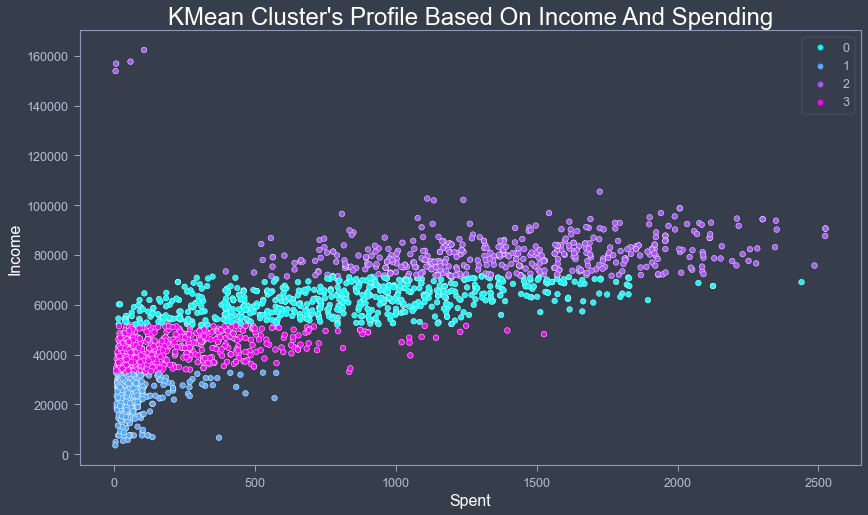

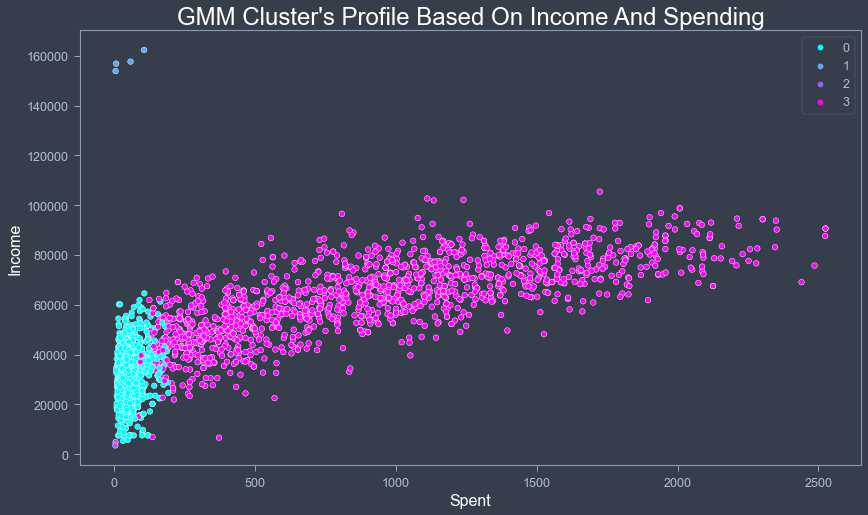

In [2125]:
plt.figure(figsize=(14,8))
pl = sns.scatterplot(data = data6,x=data6["MntTotal"], y=data6["Income"],hue=data6["K_Cluster"], palette= 'cool')
plt.xlabel("Spent", size=16, color= 'white')
plt.ylabel("Income", size=16, color= 'white')
plt.title("KMean Cluster's Profile Based On Income And Spending", size=24, color= 'white')
plt.legend()

plt.figure(figsize=(14,8))
pl = sns.scatterplot(data = data6,x=data6["MntTotal"], y=data6["Income"],hue=data6["G_Cluster"], palette= 'cool')
plt.xlabel("Spent", size=16, color= 'white')
plt.ylabel("Income", size=16, color= 'white')
plt.title("GMM Cluster's Profile Based On Income And Spending", size=24, color= 'white')
plt.legend()
plt.show()


<Figure size 345.6x259.2 with 0 Axes>

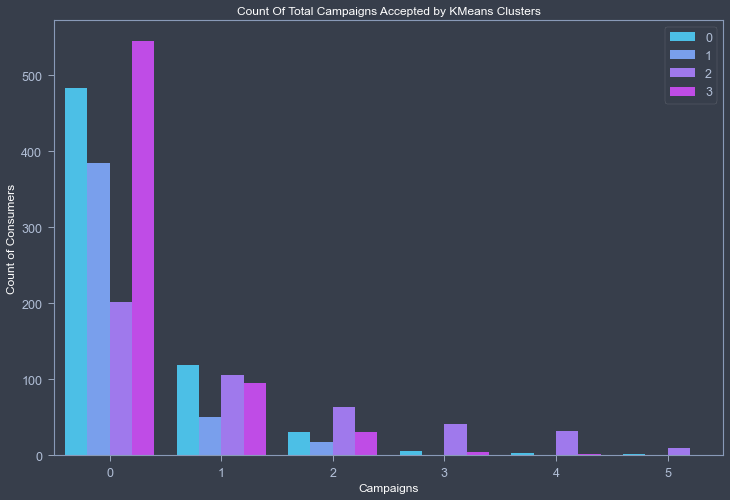

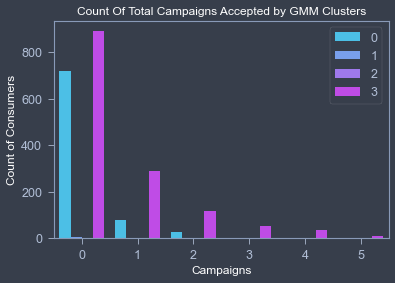

In [2126]:
plt.figure()
plt.figure(figsize=(12,8))
pl = sns.countplot(x=data6["TotalAcceptedCmp"],hue=data6["K_Cluster"], palette= 'cool')
plt.xlabel("Campaigns", size=12, color= 'white')
plt.ylabel("Count of Consumers", size=12, color= 'white')
pl.set_title("Count Of Total Campaigns Accepted by KMeans Clusters", size=12, color= 'white')
plt.legend(loc="upper right")

plt.figure(figsize=(6,4))
pl = sns.countplot(x=data6["TotalAcceptedCmp"],hue=data6["G_Cluster"], palette= 'cool')
plt.xlabel("Campaigns", size=12, color= 'white')
plt.ylabel("Count of Consumers", size=12, color= 'white')
pl.set_title("Count Of Total Campaigns Accepted by GMM Clusters", size=12, color= 'white')
plt.legend(loc="upper right")


plt.show()

<Figure size 345.6x259.2 with 0 Axes>

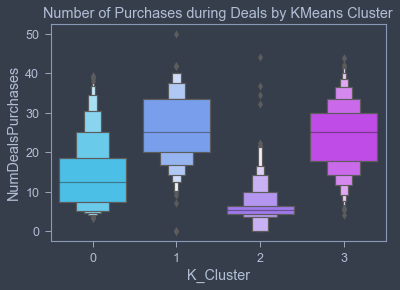

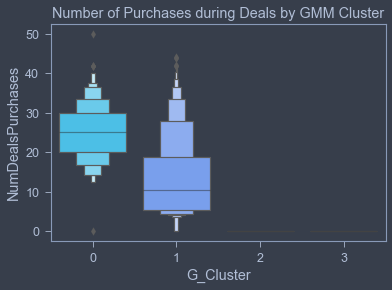

In [2054]:
plt.figure()
plt.figure(figsize=(6,4))
pl=sns.boxenplot(y=data6["NumDealsPurchases"],x=data6["K_Cluster"], palette= 'cool')
pl.set_title("Number of Purchases during Deals by KMeans Cluster")
plt.figure(figsize=(6,4))
pl=sns.boxenplot(y=data6["NumDealsPurchases"],x=data6["G_Cluster"], palette= 'cool')
pl.set_title("Number of Purchases during Deals by GMM Cluster")
plt.show()

<Figure size 345.6x259.2 with 0 Axes>

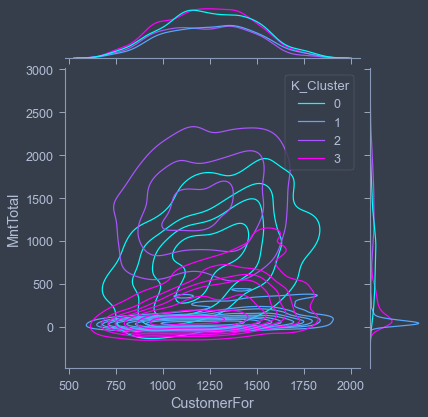

<Figure size 345.6x259.2 with 0 Axes>

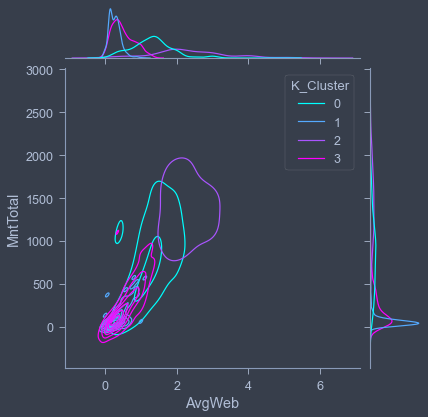

<Figure size 345.6x259.2 with 0 Axes>

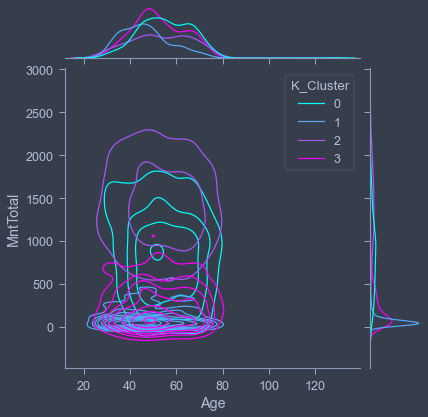

<Figure size 345.6x259.2 with 0 Axes>

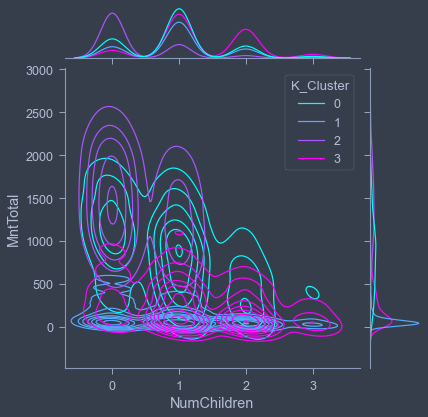

<Figure size 345.6x259.2 with 0 Axes>

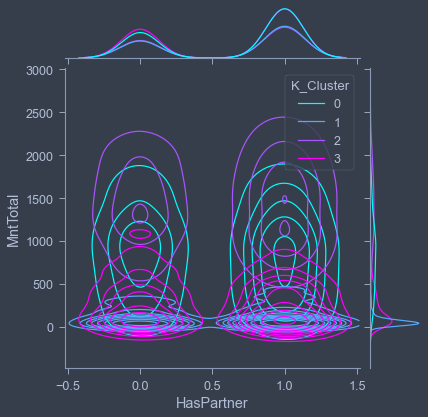

<Figure size 345.6x259.2 with 0 Axes>

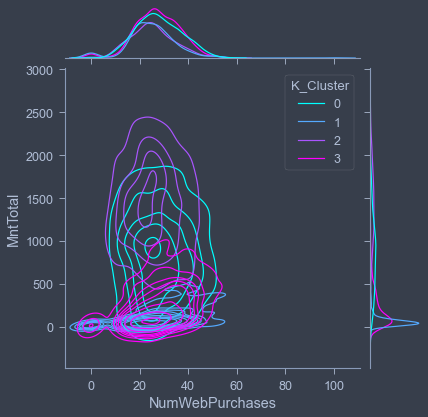

<Figure size 345.6x259.2 with 0 Axes>

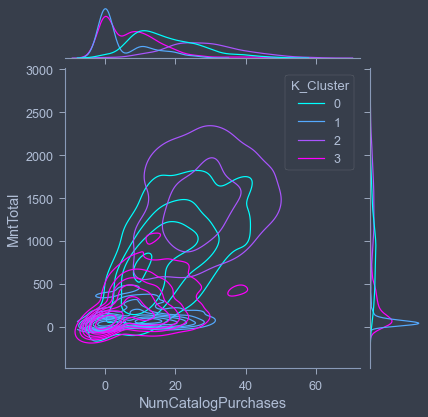

<Figure size 345.6x259.2 with 0 Axes>

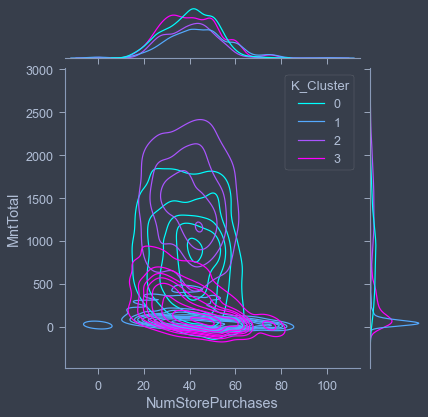

<Figure size 345.6x259.2 with 0 Axes>

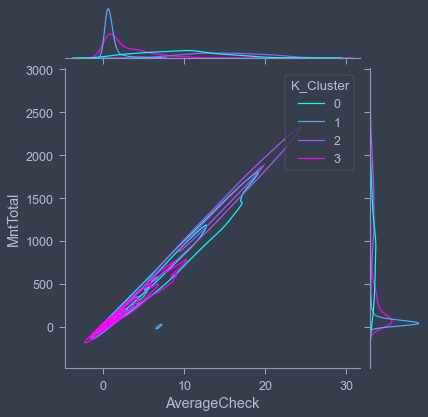

<Figure size 345.6x259.2 with 0 Axes>

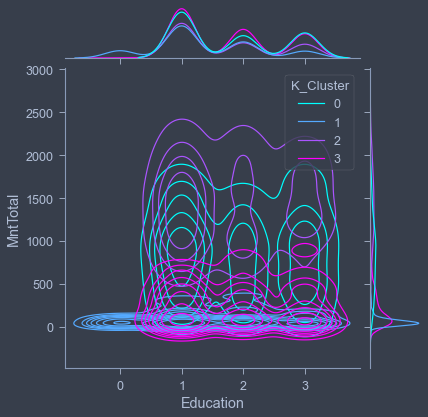

In [2055]:
data7 = data6
data7['HasPartner'] = data7["Marital_Status"].replace({'Single': '0', 
                                                      'Widow': '0',
                                                      'Divorced': '0',
                                                      'Together': '1',
                                                      'Married': '1'})
data7['HasPartner'] = data7['HasPartner'].astype('int')

data7['Education'] = data7["Education"].replace({'Below Bachelor': '0', 
                                                      'Bachelor': '1',
                                                      'Master': '2',
                                                      'PhD': '3'})
data7['Education'] = data7['Education'].astype('int')

Personal = ["CustomerFor", 'AvgWeb', "Age", "NumChildren", "HasPartner", 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'AverageCheck', "Education"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data7[i], y=data7["MntTotal"], hue =data7["K_Cluster"], kind="kde", palette='cool')
    plt.show()

<Figure size 345.6x259.2 with 0 Axes>

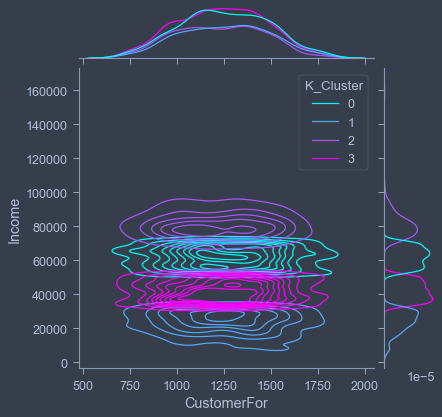

<Figure size 345.6x259.2 with 0 Axes>

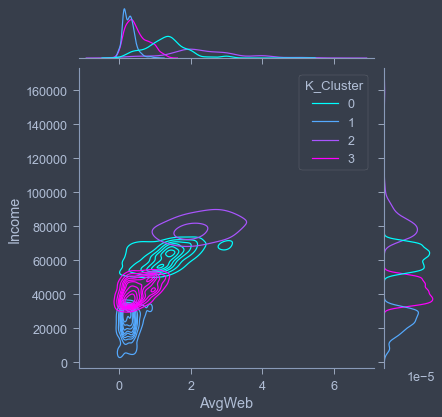

<Figure size 345.6x259.2 with 0 Axes>

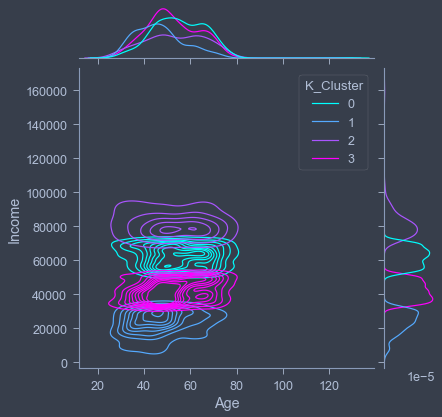

<Figure size 345.6x259.2 with 0 Axes>

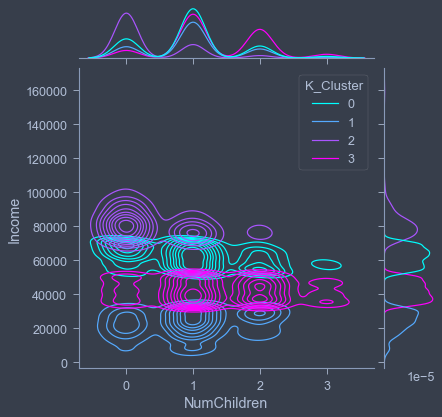

<Figure size 345.6x259.2 with 0 Axes>

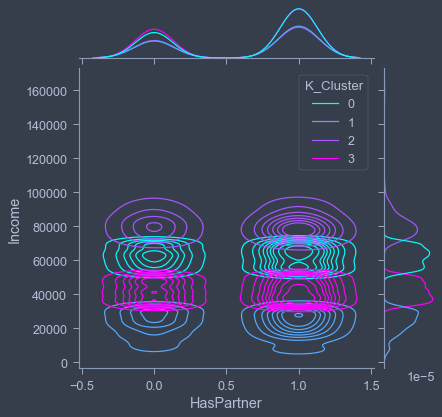

<Figure size 345.6x259.2 with 0 Axes>

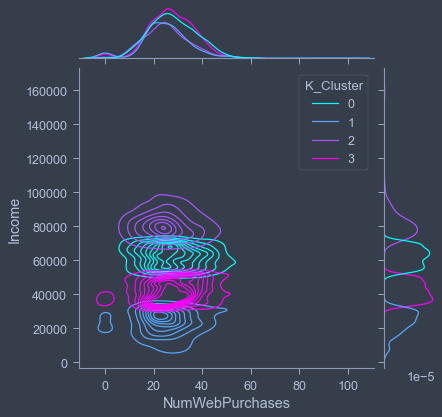

<Figure size 345.6x259.2 with 0 Axes>

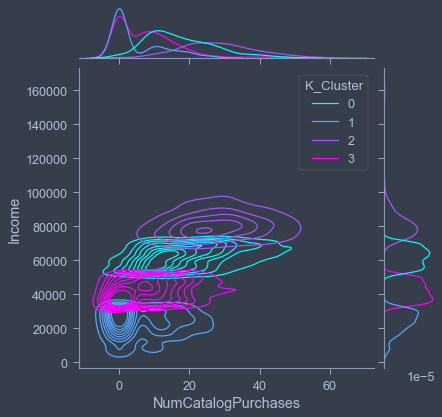

<Figure size 345.6x259.2 with 0 Axes>

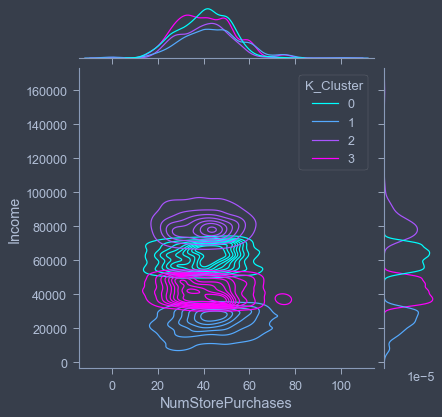

<Figure size 345.6x259.2 with 0 Axes>

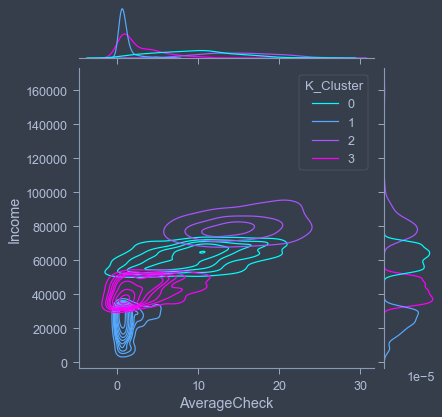

<Figure size 345.6x259.2 with 0 Axes>

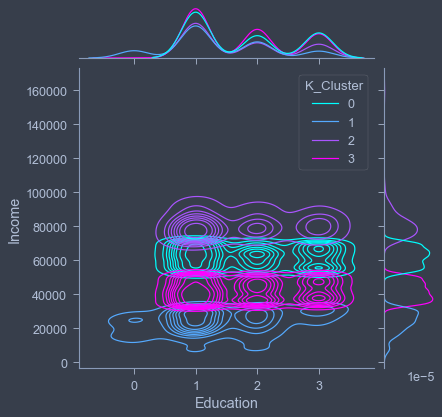

<Figure size 345.6x259.2 with 0 Axes>

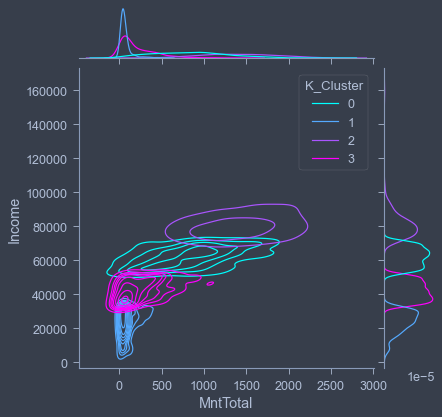

In [2109]:

Personal = ["CustomerFor", 'AvgWeb', "Age", "NumChildren", "HasPartner", 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'AverageCheck', "Education", "MntTotal"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data7[i], y=data7["Income"], hue =data7["K_Cluster"], kind="kde", palette='cool')
    plt.show()

In [2012]:
data6.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2223.0,52.222222,11.988485,25.00,44.000000,51.000000,62.000000,128.000000
CustomerFor,2223.0,1243.506973,232.087024,732.00,1072.500000,1245.000000,1417.000000,1795.000000
Education,2223.0,1.663968,0.839502,0.00,1.000000,1.000000,2.000000,3.000000
Income,2223.0,51885.707837,20973.316223,3502.00,35533.500000,51369.000000,68277.500000,162397.000000
Kidhome,2223.0,0.443995,0.538682,0.00,0.000000,0.000000,1.000000,2.000000
Teenhome,2223.0,0.506073,0.544041,0.00,0.000000,0.000000,1.000000,2.000000
TotalEnrollYrs,2223.0,8.368471,0.635829,6.97,7.900000,8.370000,8.840000,9.880000
Recency,2223.0,49.108862,28.947372,0.00,24.000000,49.000000,74.000000,99.000000
MntWines,2223.0,305.250562,337.066461,0.00,24.000000,176.000000,505.000000,1493.000000
MntFruits,2223.0,26.428250,39.884105,0.00,1.000000,8.000000,33.000000,199.000000


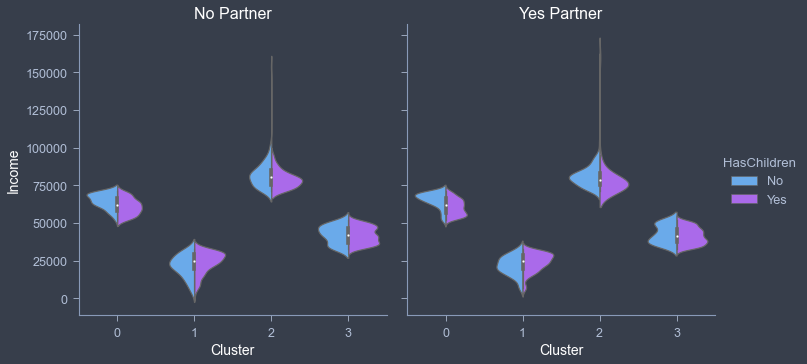

In [2130]:
g = sns.catplot(x="K_Cluster", y="Income",
                hue="HasChildren", col="HasAPartner",
                data=data6, kind="violin", split=True, palette = 'cool')
g.set_axis_labels("Cluster", "Income",size=14, color = 'White')
g.set_titles(col_template="{col_name} Partner", row_template="{row_name}", size=16, color = 'White')

Text(0.5, 1.0, 'Number of Purchases during Deals by KMeans Cluster')

<Figure size 345.6x259.2 with 0 Axes>

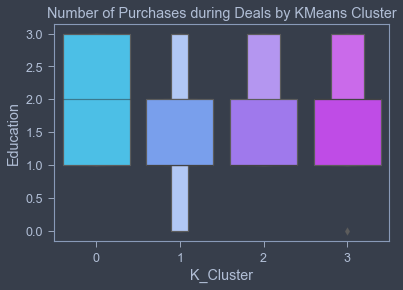

In [2131]:
plt.figure()
plt.figure(figsize=(6,4))
pl=sns.boxenplot(y=data6["Education"],x=data6["K_Cluster"], palette= 'cool')
pl.set_title("Number of Purchases during Deals by KMeans Cluster")

In [2135]:
data6['Education'] = data['Education'].astype('category')
data6['Education'].replace(['Basic','2n Cycle', 'Graduation'], 
                          ['Below Bachelor', 'Master', 'Bachelor'], inplace=True)
data6

,Age,CustomerFor,Education,Marital_Status,Income,Kidhome,Teenhome,TotalEnrollYrs,Recency,MntWines,...,AverageCheck,percentWines,percentMeat,percentFruits,percentFish,percentSweets,percentGold,K_Cluster,G_Cluster,HasPartner
0,64,1703,Bachelor,Single,58138.0,0,0,9.63,58,635,...,18.4,39.270254,33.766234,5.442177,10.636982,5.442177,5.442177,0,3,0
1,67,857,Bachelor,Single,46344.0,1,1,7.31,38,11,...,0.4,40.740741,22.222222,3.703704,7.407407,3.703704,22.222222,3,0,0
2,56,1204,Bachelor,Together,71613.0,0,0,8.26,26,426,...,8.1,54.896907,16.365979,6.314433,14.304124,2.706186,5.412371,2,3,1
3,37,797,Bachelor,Together,26646.0,1,0,7.15,26,11,...,0.7,20.754717,37.735849,7.547170,18.867925,5.660377,9.433962,1,0,1
4,40,1053,PhD,Married,58293.0,1,0,7.85,94,173,...,5.7,40.995261,27.962085,10.189573,10.900474,6.398104,3.554502,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,54,1273,Bachelor,Married,61223.0,0,1,8.45,46,709,...,15.1,52.870992,13.571961,3.206562,3.131991,8.799403,18.419090,0,3,1
2236,75,793,PhD,Together,64014.0,2,1,7.13,56,406,...,6.5,91.441441,6.756757,0.000000,0.000000,0.000000,1.801802,0,3,1
2237,40,1047,Bachelor,Divorced,56981.0,0,0,7.83,91,908,...,13.1,73.166801,17.485898,3.867849,2.578566,0.966962,1.933924,0,3,0
2238,65,1048,Master,Together,69245.0,0,1,7.83,8,428,...,9.2,50.771056,25.385528,3.558719,9.489917,3.558719,7.236062,0,3,1


<Figure size 345.6x259.2 with 0 Axes>

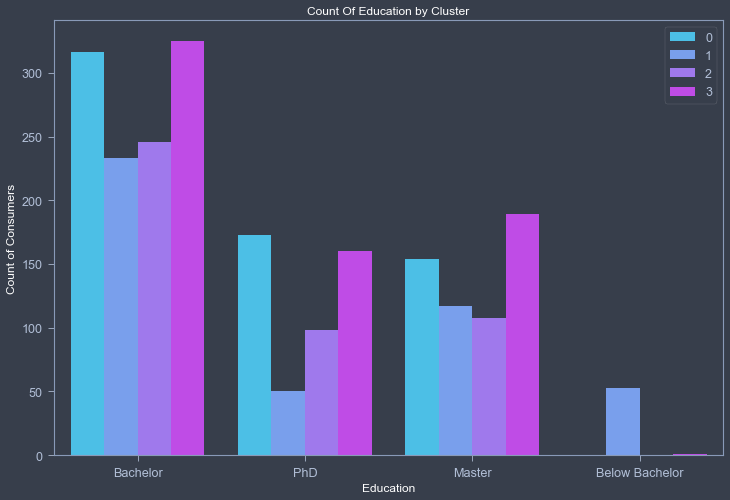

In [2136]:
plt.figure()
plt.figure(figsize=(12,8))
pl = sns.countplot(x=data6["Education"],hue=data6["K_Cluster"], palette= 'cool')
plt.xlabel("Education", size=12, color= 'white')
plt.ylabel("Count of Consumers", size=12, color= 'white')
pl.set_title("Count Of Education by Cluster", size=12, color= 'white')
plt.legend(loc="upper right")

<Figure size 345.6x259.2 with 0 Axes>

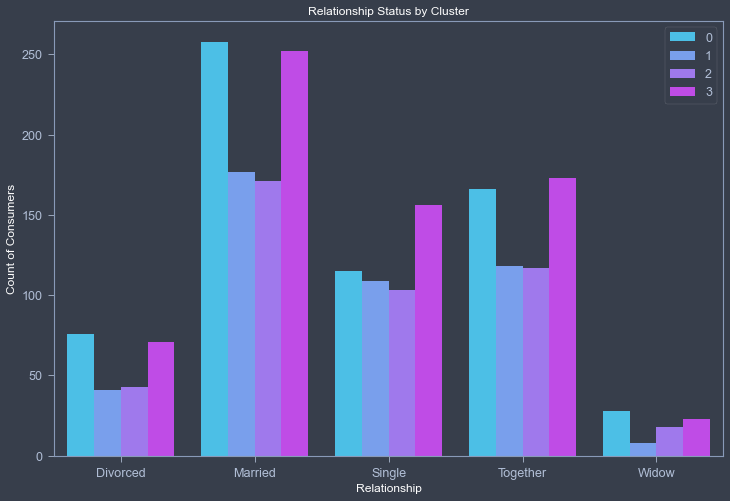

In [2142]:
plt.figure()
plt.figure(figsize=(12,8))
pl = sns.countplot(x=data6["Marital_Status"],hue=data6["K_Cluster"], palette= 'cool')
plt.xlabel("Relationship", size=12, color= 'white')
plt.ylabel("Count of Consumers", size=12, color= 'white')
pl.set_title("Relationship Status by Cluster", size=12, color= 'white')
plt.legend(loc="upper right")

<Figure size 345.6x259.2 with 0 Axes>

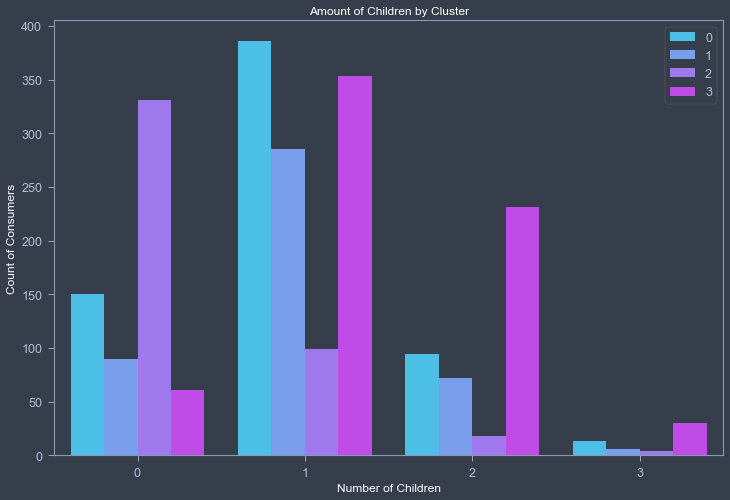

In [2140]:
plt.figure()
plt.figure(figsize=(12,8))
pl = sns.countplot(x=data6["NumChildren"],hue=data6["K_Cluster"], palette= 'cool')
plt.xlabel("Number of Children", size=12, color= 'white')
plt.ylabel("Count of Consumers", size=12, color= 'white')
pl.set_title("Amount of Children by Cluster", size=12, color= 'white')
plt.legend(loc="upper right")

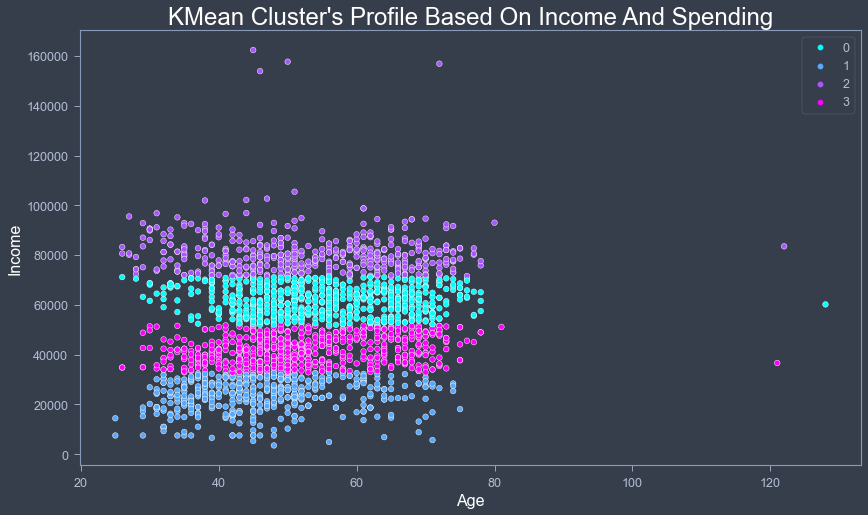

In [2137]:
plt.figure(figsize=(14,8))
pl = sns.scatterplot(data = data6,x=data6["Age"], y=data6["Income"],hue=data6["K_Cluster"], palette= 'cool')
plt.xlabel("Age", size=16, color= 'white')
plt.ylabel("Income", size=16, color= 'white')
plt.title("KMean Cluster's Profile Based On Income And Spending", size=24, color= 'white')
plt.legend()